다항회귀
- 직선으로 많은 데이터를 만족할 수 없는 선형회귀의 경우 사용
- 기존 피쳐를 조합해서 항을 늘여주는 작업 ==> 전처리에서 진행

In [1]:
### 모듈로딩
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [2]:
# 임의의 데이터 생성 ==> 2D
x=np.arange(10).reshape(-1,2)
y=np.arange(5)
x.shape, y.shape

((5, 2), (5,))

In [3]:
# 피쳐 2개 ==> 조합에서 늘리기
# poly=PolynomialFeatures()
poly=PolynomialFeatures(include_bias=False, degree=5) # 1 제거 # degree => 5차원

# poly.fit(x)
# poly.transform(x)
x2=poly.fit_transform(x) # 한번만 쓸 경우
x2.shape

(5, 20)

In [4]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

모델에 적용

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# poly=PolynomialFeatures(include_bias=False, degree=5) # 1 제거 # degree => 5차원
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [7]:
from sklearn.pipeline import Pipeline
x1=poly.fit_transform(x)
pipe = Pipeline([('poly', poly), ('lrmodel', model)])
pipe.fit(x1, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('lrmodel', LinearRegression())])

In [8]:
pipe.named_steps['lrmodel'].coef_

array([-4.40413932e-15,  2.05098671e-24,  1.13365813e-22, ...,
       -5.23394795e-13,  6.95574807e-14,  1.65183431e-12])

In [9]:
pipe.named_steps['poly'].degree

5

In [10]:
def polynomial_func(x):
    y = 1 + 2*x[:,0] + 3*x[:,0]**2 + 4*x[:,1]**3
    return y

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# 임의의 값으로 구성된 x값에 대해 코사인 변환 값을 반환.
def true_fun(x):
    return np.cos(1.5 * np.pi * x)

In [13]:
# x는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))


Degree 1 회귀계수는 [-1.49]입니다.
Degree 1 MSE 는 0.40749914882743843입니다.

Degree 4 회귀계수는 [  2.7  -27.43  38.45 -14.59]입니다.
Degree 4 MSE 는 0.007821973331362638입니다.

Degree 15 회귀계수는 [-1.46900000e+02  3.70913000e+03 -4.16955800e+04  2.03140190e+05
  1.17284530e+05 -7.23879755e+06  4.55942066e+07 -1.61261195e+08
  3.76463908e+08 -6.09280059e+08  6.90794011e+08 -5.40197709e+08
  2.78143659e+08 -8.49828928e+07  1.16825755e+07]입니다.
Degree 15 MSE 는 340264901.87848765입니다.


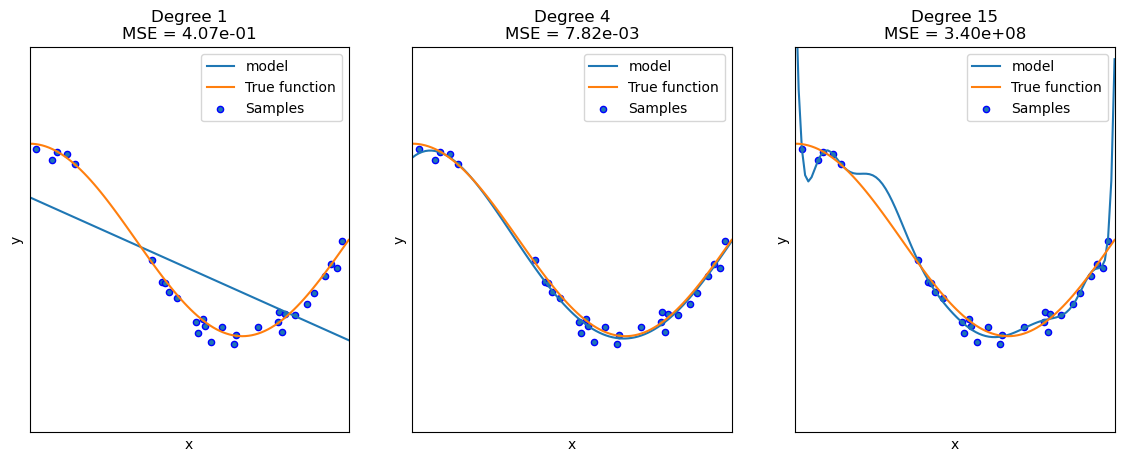

In [15]:
# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(x) + np.random.randn(n_samples) * 0.1
plt.figure(figsize=(14,5))
degrees=[1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(x.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, x.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀계수는 {1}입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    x_test = np.linspace(0, 1, 100)
    # 예측 값 곡선
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label='model')
    # 실제 값 곡선
    plt.plot(x_test, true_fun(x_test), label='True function')
    plt.scatter(x, y, edgecolors='b', s=20, label='Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()